<h2><font color="#004D7F" size=6>Módulo 4. Machine Learning</font></h2>

<h1><font color="#004D7F" size=5>1. Redes Neuronales </font></h1>

<h1><font color="#004D7F" size=5>1. Perceptron </font></h1>
<br>
<div style="text-align: right">
<font color="#004D7F" size=3>Luisa López Vázquez</font><br>
<font color="#004D7F" size=3>Diplomado en Ciencia de Datos</font><br>

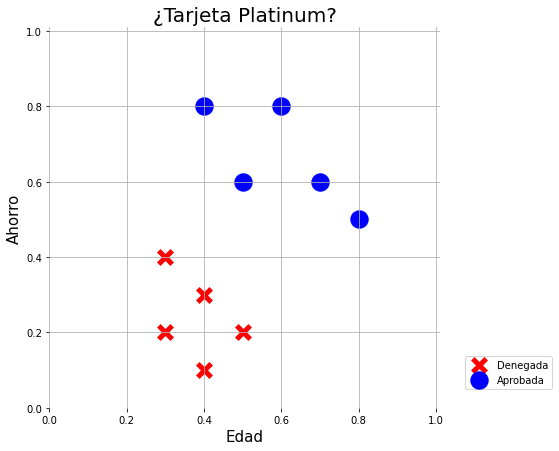

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de 10 personas -> [edad, ahorro]

personas = np.array([[0.3, 0.4], [0.4, 0.3],
                     [0.3, 0.2], [0.4, 0.1], 
                     [0.5, 0.2], [0.4, 0.8],
                     [0.6, 0.8], [0.5, 0.6], 
                     [0.7, 0.6], [0.8, 0.5]])

# 1 : aprobrada    0 : denegada

clases = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Gráfica de dispersión (edad, ahorro)
plt.figure(figsize=(7, 7))
plt.title("¿Tarjeta Platinum?", fontsize=20)
plt.scatter(personas[clases == 0].T[0], 
            personas[clases == 0].T[1], 
            marker="x", s=180, color="red",
            linewidths=5, label="Denegada")
plt.scatter(personas[clases == 1].T[0],
            personas[clases == 1].T[1], 
            marker="o", s=180, color="blue",
            linewidths=5, label="Aprobada")
plt.xlabel("Edad", fontsize=15)
plt.ylabel("Ahorro", fontsize=15)
plt.legend(bbox_to_anchor=(1.3, 0.15))
plt.box(False)
plt.xlim((0, 1.01))
plt.ylim((0, 1.01))
plt.grid()
plt.show()


# Función de Activación (Escalón)

In [11]:
# la b hace referencia al sesgo al umbral
def activacion(pesos,x,b):
    z = pesos * x
    if z.sum() +  b > 0: #si la condicion e mayor que 0 le otorgamo la tarjeta
        return 1
    else:
        return 0

pesos=np.random.uniform(-1,1, size=2) #dos pesos
b = np.random.uniform(-1,1)# valor aleatorio del umbral y puede er cualquier valor posito o negativo
pesos,b, activacion(pesos, [0.5,0.6],b)

(array([0.61909777, 0.83794742]), 0.5623127320288586, 1)


<h2 style="color:purple">Pseudocódigo del Perceptrón</h2>
<br>
<span style="color:red">0.</span> Inicializar los pesos y el umbral <br>
<span style="color:red">1.</span> epocas máximas = 100 <br>
<span style="color:red">2.</span> epoca = 0 <br>
<span style="color:red">3.</span> tasa de aprendizaje = 0.01 <br>
<span style="color:red">4.</span> Mientras (epoca < epocas máximas) hacer: <br>
<span style="color:red">5.</span> &nbsp;&nbsp;&nbsp;&nbsp; Para cada instancia de entrenamiento hacer: <br>
<span style="color:red">6.</span> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Calcula salida del perceptrón para esa estancia <br>
<span style="color:red">7.</span> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Calcula el error <br>
<span style="color:red">8.</span> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Actualiza pesos y umbral usando la tasa de aprendizaje, la instancia y el error<br>
<span style="color:red">9.</span> &nbsp;&nbsp;&nbsp;&nbsp; epoca += 1 <br>
<br><br><br>
<h2 style="color:purple">Entrenamiento del Perceptrón</h2>

In [14]:
pesos = np.random.uniform(-1, 1, size=2) #inicilizaos tasa y pesos aleatorio
b = np.random.uniform(-1, 1)
tasa_de_aprendizaje = 0.01
epocas = 100
# Lo va hacer para las 10 personas y lo va hacer 100 veces 
for epoca in range(epocas):
    error_total = 0 # nos ayuda a ver como se va moviendo el error
    for i in range(len(personas)):
        prediccion = activacion(pesos, personas[i], b)
        error = clases[i] - prediccion # si la preddicon me da 1 es que le otorgo la tarjeta
        error_total += error**2 # quitamos el simbolo del error por que puede haber negativos se eleva al cuadrado nos quita numeros negativos
        pesos[0] += tasa_de_aprendizaje * personas[i][0] * error # cero corresponde a la edad si uvo un error lo multiplica
        pesos[1] += tasa_de_aprendizaje * personas[i][1] * error # 1 corresponde a los ahorros de la persona
        b += tasa_de_aprendizaje * error  # Ajustamos el umbral  b es el umbral lo ajustamos
    print(error_total, end=" ") # imprimimo el error total end es terminador de espacio

activacion(pesos, [0.5, 0.5], b) #llamamos nuestra función de activación 0.5, 0.8

6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 4 5 4 5 4 4 5 4 4 5 4 4 5 4 4 4 5 4 4 5 3 2 2 3 2 2 2 2 3 2 2 2 2 2 3 2 2 2 2 3 2 2 2 2 3 2 2 2 2 2 3 2 2 2 2 3 2 2 2 2 2 3 2 2 2 2 3 2 2 2 2 2 3 2 2 1 2 2 2 2 1 2 2 

1

# Zonas de aprobación
### Gráfica de dispersión [edad, ahorro] 

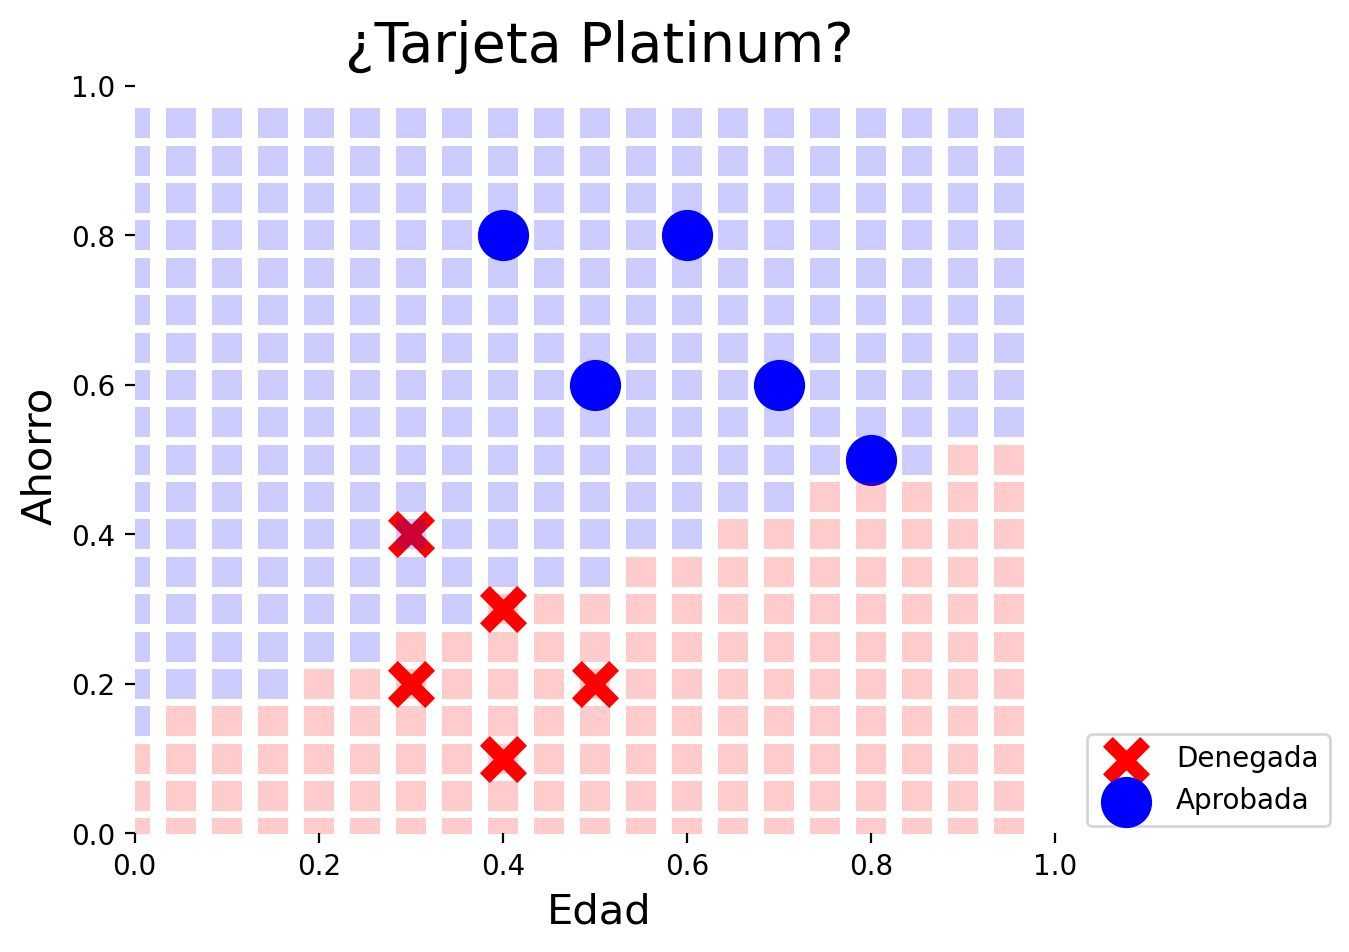

In [21]:
plt.figure(figsize=(6, 5), dpi=200)
plt.title("¿Tarjeta Platinum?", fontsize=20)

plt.scatter(personas[clases == 0].T[0], 
            personas[clases == 0].T[1], 
            marker="x", s=180, color="red",
            linewidths=5, label="Denegada")

plt.scatter(personas[clases == 1].T[0],
            personas[clases == 1].T[1], 
            marker="o", s=180, color="blue",
            linewidths=5, label="Aprobada")

for edad in np.arange(0, 1, 0.05):
    for ahorro in np.arange(0, 1, 0.05):
        color = activacion(pesos, [edad, ahorro], b)
        if color == 1:
            plt.scatter(edad, ahorro, marker="s", s=110,
                        color="blue", alpha=0.2, linewidths=0)
        else:
            plt.scatter(edad, ahorro, marker="s", s=110, 
                        color="red", alpha=0.2, linewidths=0)
            
plt.xlabel("Edad", fontsize=15)
plt.ylabel("Ahorro", fontsize=15)
plt.legend(bbox_to_anchor=(1.3, 0.15))
plt.box(False)
plt.xlim((0, 1.01))
plt.ylim((0, 1.01))
plt.savefig('grafica.png');
#plt.show()

# Perceptrón con Scikit-learn

In [22]:
# Datos de 10 personas -> [edad, ahorro]

personas = np.array([[0.3, 0.4], [0.4, 0.3],
                     [0.3, 0.2], [0.4, 0.1], 
                     [0.5, 0.2], [0.4, 0.8],
                     [0.6, 0.8], [0.5, 0.6], 
                     [0.7, 0.6], [0.8, 0.5]])

# 1 : aprobrada    0 : denegada

clases = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [24]:
from sklearn.linear_model import Perceptron

perceptron= Perceptron().fit(personas,clases)# creamos modelo 

lista=[[0.2,0.2],[0.5,0.6],[0.3,0.9],[0.4,0.7]] #persona
perceptron.predict(lista) # hacemo la prediccion

array([0, 1, 1, 1])